In [183]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [184]:
import matplotlib.pylab as plt
import seaborn as sns; sns.set() 
%matplotlib inline

### Q1 Read the input file ( zoo data CSV ) and check the data dimension

In [185]:
zoo_df=pd.read_csv("zoo.csv")
print('shape:',zoo_df.shape)
zoo_df.info()

shape: (101, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


### Q2. Drop animal_name 


In [186]:
zoo_df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [187]:
zoo_df.drop(labels='animal_name',axis=1,inplace=True)

In [188]:
zoo_df.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'class_type'],
      dtype='object')

### Q3 Check distribution of target variable

In [189]:
zoo_df.class_type.unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [193]:
zoo_df.class_type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

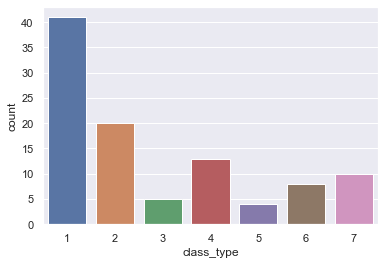

In [194]:
sns.countplot(x='class_type',data=zoo_df)

### Q4. Check for missing values

In [195]:
zoo_df.isna().sum()  #No missing value in Data set

hair          0
feathers      0
eggs          0
milk          0
airborne      0
aquatic       0
predator      0
toothed       0
backbone      0
breathes      0
venomous      0
fins          0
legs          0
tail          0
domestic      0
catsize       0
class_type    0
dtype: int64

### Q5. Import class file and understand the data

In [196]:
class_df=pd.read_csv("class.csv")
class_df

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [197]:
class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
Class_Number                         7 non-null int64
Number_Of_Animal_Species_In_Class    7 non-null int64
Class_Type                           7 non-null object
Animal_Names                         7 non-null object
dtypes: int64(2), object(2)
memory usage: 304.0+ bytes


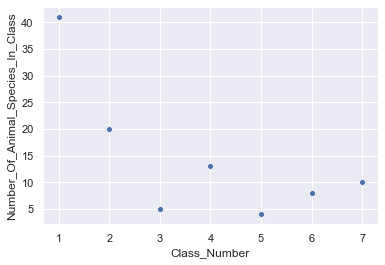

In [198]:
sns.scatterplot(x='Class_Number',y='Number_Of_Animal_Species_In_Class',data=class_df)

### Q6. Standardize the data 

In [199]:
from scipy.stats import zscore

In [200]:
zoo_df.drop(labels='class_type',axis=1,inplace=True)
zoo_df=zoo_df.apply(zscore)

In [201]:
zoo_df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180


### Q7. Find out the linkage matrix

In [202]:
import scipy.cluster.hierarchy as shc
shc1=shc.linkage(zoo_df.values, method='complete',metric='euclidean')

### Q8. Plot the dendrogram.

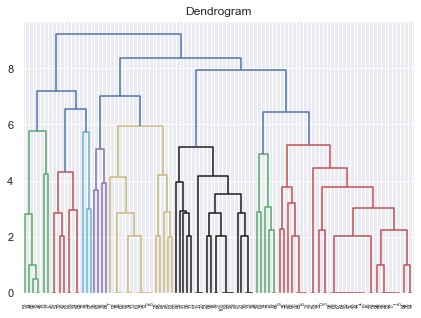

In [203]:
plt.figure(figsize=(7,5))
plt.title('Dendrogram')
dend = shc.dendrogram(shc1)

### Q9. Recreate the dendrogram for the last 4, 7, and 12 merged clusters 

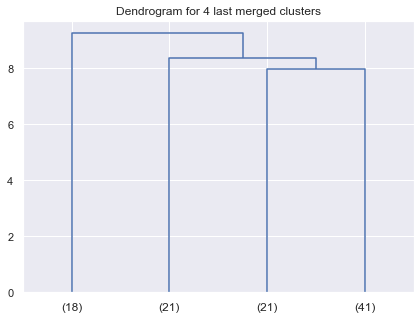

In [204]:
plt.figure(figsize=(7,5))
plt.title('Dendrogram for 4 last merged clusters')
dend = shc.dendrogram(shc1,p=4,truncate_mode='lastp')

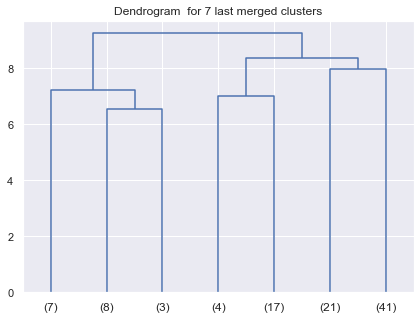

In [205]:
plt.figure(figsize=(7,5))
plt.title('Dendrogram  for 7 last merged clusters')
dend = shc.dendrogram(shc1,p=7,truncate_mode='lastp')

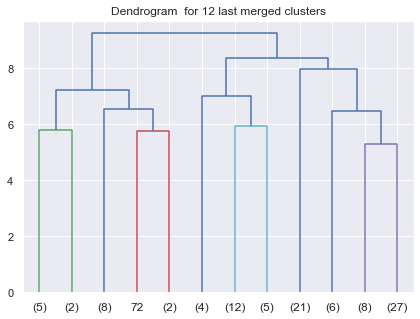

In [206]:
plt.figure(figsize=(7,5))
plt.title('Dendrogram  for 12 last merged clusters')
dend = shc.dendrogram(shc1,p=12,truncate_mode='lastp')

### Q10. select an optimum number of clusters and predict the cluster label for the scaled_data

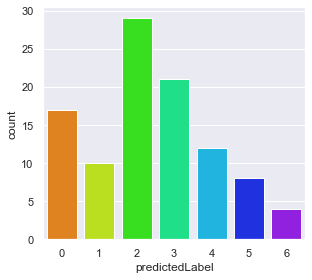

In [207]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=7)
zoo_df['predictedLabel'] = ac.fit_predict(zoo_df)
sns.set(rc={'figure.figsize':(4.7,4.27)})
sns.countplot(data=zoo_df, x=zoo_df['predictedLabel'], palette='gist_rainbow')

In [208]:
zoo_df['predictedLabel'].value_counts()

2    29
3    21
0    17
4    12
1    10
5     8
6     4
Name: predictedLabel, dtype: int64